In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random as rn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Random control

In [4]:
np.random.seed(1234)
rn.seed(1234)
tf.random.set_seed(1234)

## Create a dataset

In [13]:
data_dir = '/content/drive/MyDrive/ProjectData/Train'

batch_size = 32
img_height = 224
img_width = 224

Training set

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1234,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13834 files belonging to 6 classes.
Using 11068 files for training.


Validation set

In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1234,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13834 files belonging to 6 classes.
Using 2766 files for validation.


## Visualize the data

In [ ]:
class_names = train_ds.class_names

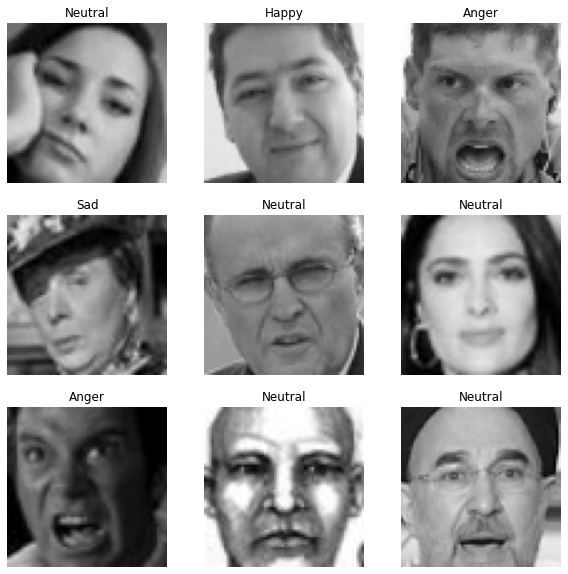

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[labels[i]])
    plt.axis("off")

Train a model using these datasets by passing them to `model.fit` in a moment.

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


# Download the models

ResNet50 pre-trained

In [9]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

102981632/102967424 [==============================] - 2s 0us/step


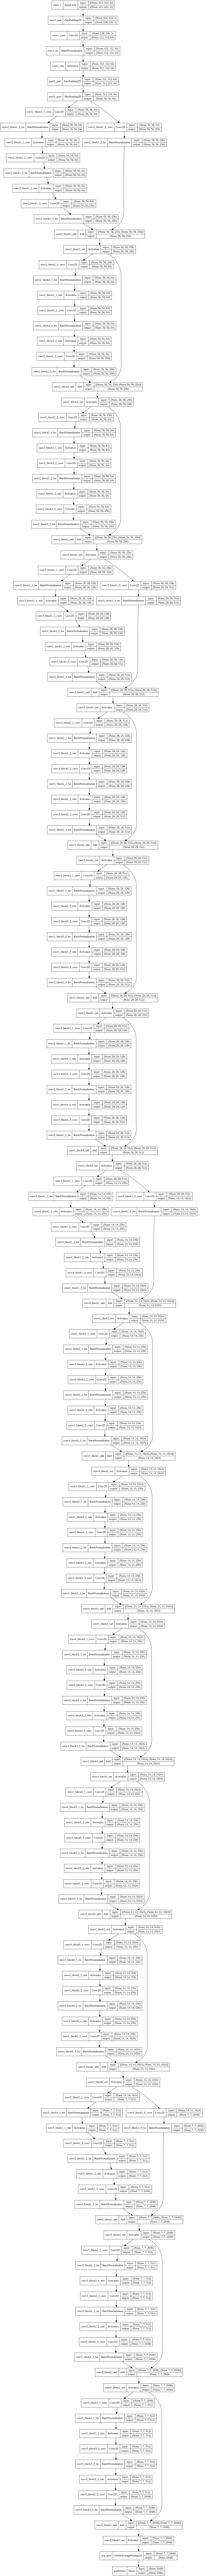

In [106]:
tf.keras.utils.plot_model(model, to_file="ResNet model.png", show_shapes=True)

VGG16 pre-trained

In [47]:
model_2 = tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

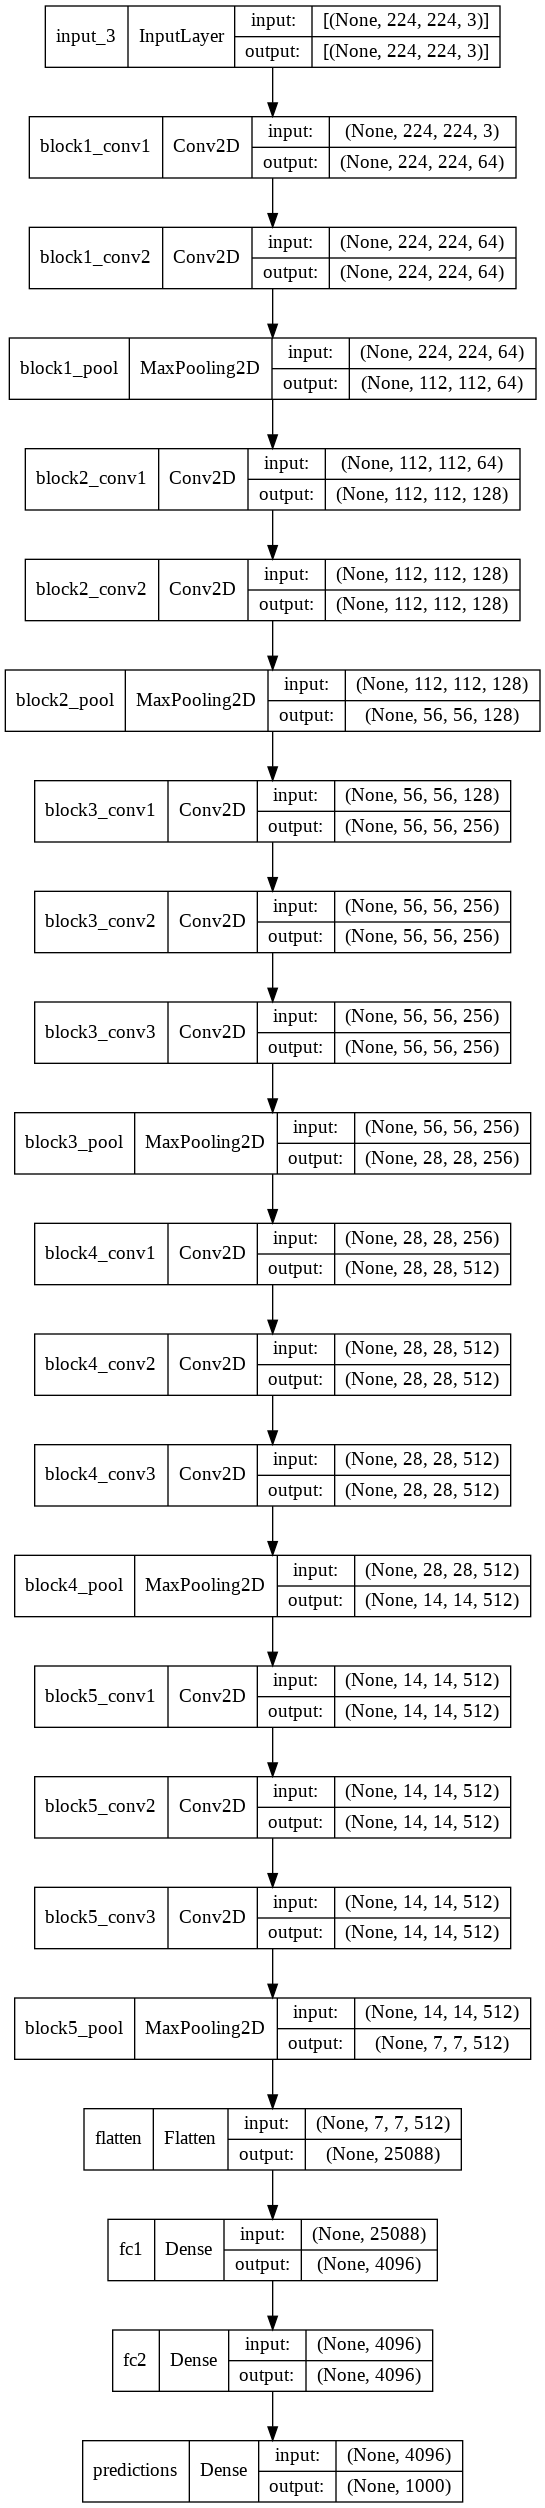

In [107]:
tf.keras.utils.plot_model(model_2, to_file="VGG16 model.png", show_shapes=True)

## Compile the model

Compile ResNet50

In [17]:
# компиляция модели
model.compile(  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam'),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = 'accuracy'
            )

Compile VGG16

In [49]:
# компиляция модели
model_2.compile(  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam'),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = 'accuracy'
            )

Early stop

In [50]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=5, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True
)

## Train the model

ResNet train

In [19]:
# обучение модели
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


346/346 [==============================] - 1910s 5s/step - loss: 0.9083 - accuracy: 0.7376 - val_loss: 0.7291 - val_accuracy: 0.7364
Epoch 2/10
346/346 [==============================] - 118s 340ms/step - loss: 0.3447 - accuracy: 0.8772 - val_loss: 0.5823 - val_accuracy: 0.8001
Epoch 3/10
346/346 [==============================] - 121s 348ms/step - loss: 0.1836 - accuracy: 0.9337 - val_loss: 2.6102 - val_accuracy: 0.4103
Epoch 4/10
346/346 [==============================] - 122s 350ms/step - loss: 0.1247 - accuracy: 0.9561 - val_loss: 3.8141 - val_accuracy: 0.3543
Epoch 5/10
346/346 [==============================] - 122s 350ms/step - loss: 0.0888 - accuracy: 0.9704 - val_loss: 0.9885 - val_accuracy: 0.7726
Epoch 6/10
346/346 [==============================] - 122s 351ms/step - loss: 0.0703 - accuracy: 0.9761 - val_loss: 1.0989 - val_accuracy: 0.7426
Epoch 7/10
346/346 [==============================] - 122s 351ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.9132 - val_accuracy

VGG16 train

In [51]:
# обучение модели
epochs=10
history2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


346/346 [==============================] - 181s 494ms/step - loss: 0.9721 - accuracy: 0.6738 - val_loss: 0.7916 - val_accuracy: 0.7245
Epoch 2/10
346/346 [==============================] - 161s 465ms/step - loss: 0.6627 - accuracy: 0.7681 - val_loss: 0.6465 - val_accuracy: 0.7820
Epoch 3/10
346/346 [==============================] - 164s 473ms/step - loss: 0.5257 - accuracy: 0.8199 - val_loss: 0.6072 - val_accuracy: 0.8033
Epoch 4/10
346/346 [==============================] - 165s 475ms/step - loss: 0.4369 - accuracy: 0.8469 - val_loss: 0.6255 - val_accuracy: 0.7943
Epoch 5/10
346/346 [==============================] - 165s 476ms/step - loss: 0.3564 - accuracy: 0.8751 - val_loss: 0.6388 - val_accuracy: 0.8091
Epoch 6/10
346/346 [==============================] - 164s 474ms/step - loss: 0.3012 - accuracy: 0.8960 - val_loss: 0.6488 - val_accuracy: 0.8098
Epoch 7/10
346/346 [==============================] - 164s 473ms/step - loss: 0.2343 - accuracy: 0.9150 - val_loss: 0.6871 - val_accura

## Visualize training results

ResNet results

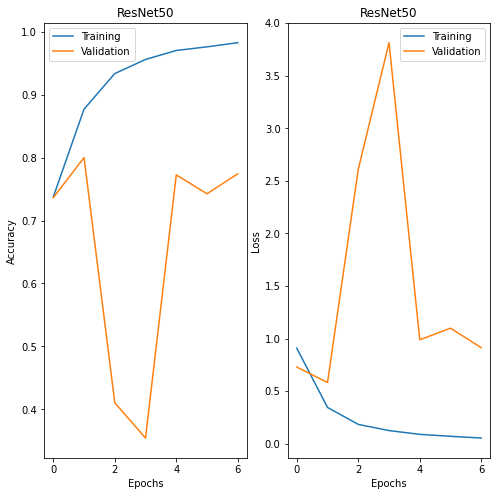

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(7)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='upper left')
plt.title('ResNet50')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('ResNet50')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Saving ResNet train

In [94]:
model.save('/content/drive/MyDrive/ProjectData/ResNet_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ProjectData/ResNet_Model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


VGG16 results

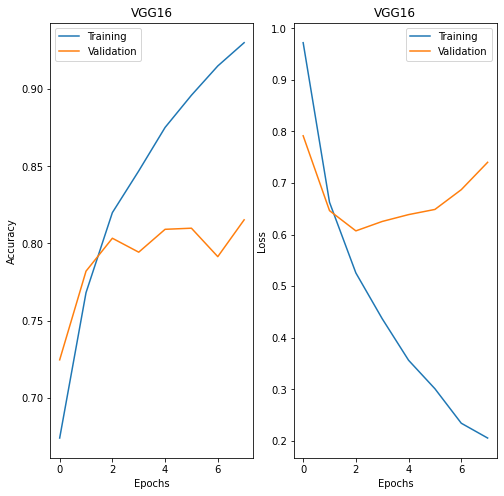

In [91]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='upper left')
plt.title('VGG16')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('VGG16')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Saving VGG16 train

In [93]:
model_2.save('/content/drive/MyDrive/ProjectData/VGG16_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ProjectData/VGG16_Model/assets


### Check on test dataset

In [95]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/ProjectData/Test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4136 files belonging to 6 classes.


ResNet accuracy on test set

In [96]:
test_loss, test_acc = model.evaluate(test_ds)
print(test_loss, test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 148s 1s/step - loss: 0.8634 - accuracy: 0.6905
0.8634235858917236 0.6905222535133362


In [97]:
predictions = np.array([])
labels =  np.array([])
scores = np.array([])

In [98]:
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, y.numpy()])
  scores = np.concatenate([scores, model.predict(x)[:, 1]])

In [99]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,predictions)
print(cf_matrix)

[[ 180    0   30   52   27   11]
 [  19   40    1   31    4    4]
 [  61    0 1103  120   51   15]
 [  56    0   76 1002  145   23]
 [  63    0   51  277  238    8]
 [  23    0   47   72   13  293]]


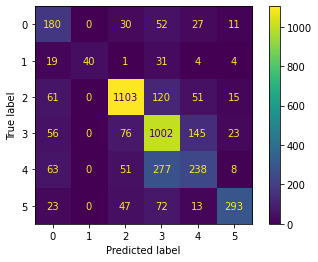

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

VGG16 accuracy on test set

In [101]:
test_loss, test_acc = model_2.evaluate(test_ds)
print(test_loss, test_acc)

130/130 [==============================] - 18s 137ms/step - loss: 0.9161 - accuracy: 0.6717
0.9161195755004883 0.6716634631156921


In [102]:
predictions = np.array([])
labels =  np.array([])
scores = np.array([])

In [103]:
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model_2.predict(x), axis=1)])
  labels = np.concatenate([labels, y.numpy()])
  scores = np.concatenate([scores, model_2.predict(x)[:, 1]])

In [104]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,predictions)
print(cf_matrix)

[[ 152    4   36   97    2    9]
 [  28   26    4   36    2    3]
 [  68    1 1167   98    3   13]
 [  37    1  124 1114   18    8]
 [  75    0   71  448   38    5]
 [  29    0   48   89    1  281]]


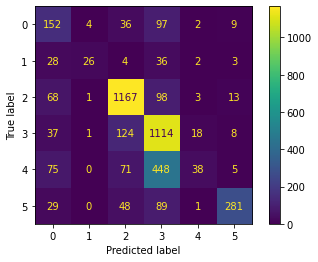

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(cf_matrix).plot()